# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
# Requests
import requests
import json
import time
from pprint import pprint
from sklearn.linear_model import LinearRegression

# Data Science
import pandas as pd
import numpy as np
import scipy.stats as sc

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        if (response.status_code==200):
            # Extract data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_name = city_weather.get("name")
            city_country = city_weather.get("sys", {}).get("country")
            city_date = city_weather.get("dt")
            city_humidity = city_weather.get("main", {}).get("humidity")
            city_max_temp = city_weather.get("main", {}).get("temp")
            city_pressure = city_weather.get("main", {}).get("pressure")
            city_clouds = city_weather.get("clouds", {}).get("all")
            city_wind = city_weather.get("wind", {}).get("speed")
    
            city_lat = city_weather.get("coord", {}).get("lat")
            city_lng = city_weather.get("coord", {}).get("lon")
            
            

            # Append the City information into city_data list
            city_data.append({"City": city_name,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Pressure": city_pressure,
                          "Country": city_country,
                          "Date": city_date})
        else:
            print(f"YO! The API threw a non-200 status code: {response['status_code']} for city {city}") # error log
            print()
     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | haiku-pauwela
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | chibougamau
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | san pedro pochutla
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | amarante do maranhao
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | lobujya
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | zaozersk
Processing Record 14 of Set 1 | minas de marcona
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | brookings
Processing Record 17 of Set 1 | amuntai
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | waitangi
Processin

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Pressure      568
Country       568
Date          568
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Haiku-Pauwela,20.9219,-156.3051,75.96,67,20,24.00,1016,US,1733001057
1,Hawaiian Paradise Park,19.5933,-154.9731,78.08,69,0,8.05,1016,US,1733001058
2,Adamstown,-25.0660,-130.1015,73.17,82,72,16.22,1021,PN,1733001059
3,Bethel,41.3712,-73.4140,34.30,55,100,6.91,1015,US,1733001031
4,Chibougamau,49.9168,-74.3659,22.62,86,100,6.91,1004,CA,1733001061


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
City_ID,,,,,,,,,,
0,Haiku-Pauwela,20.9219,-156.3051,75.96,67,20,24.00,1016,US,1733001057
1,Hawaiian Paradise Park,19.5933,-154.9731,78.08,69,0,8.05,1016,US,1733001058
2,Adamstown,-25.0660,-130.1015,73.17,82,72,16.22,1021,PN,1733001059
3,Bethel,41.3712,-73.4140,34.30,55,100,6.91,1015,US,1733001031
4,Chibougamau,49.9168,-74.3659,22.62,86,100,6.91,1004,CA,1733001061


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

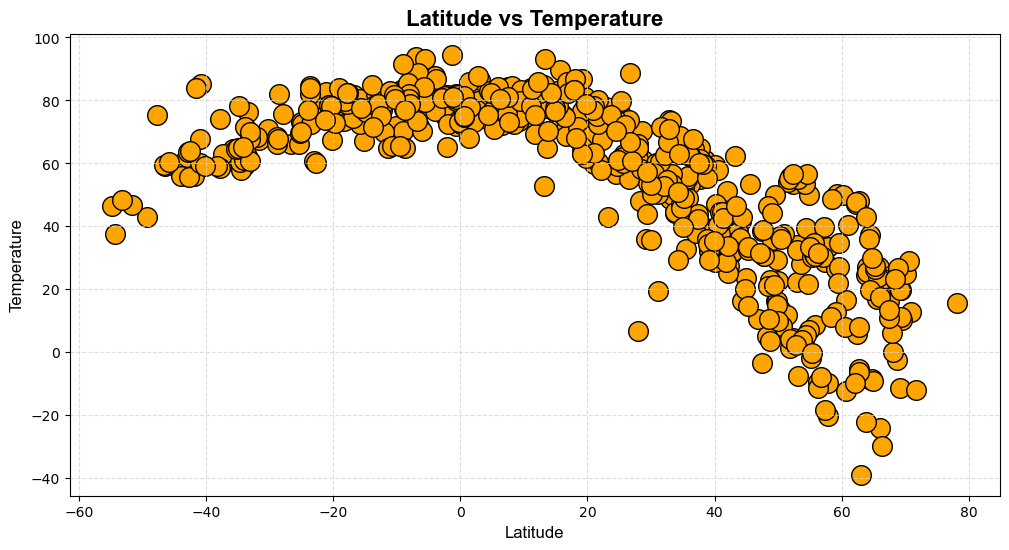

In [21]:
# Build scatter plot for latitude vs. temperate

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df.Lat, df["Max Temp"], color="orange", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Temperature", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16, fontfamily="Arial")


# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

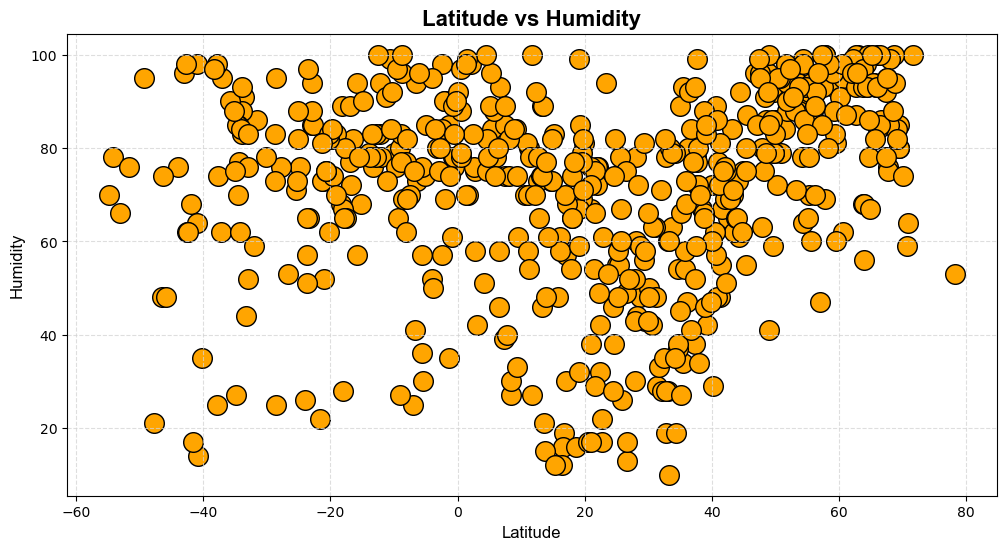

In [22]:
# Build the scatter plots for latitude vs. humidity

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df.Lat, df["Humidity"], color="orange", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Humidity", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16, fontfamily="Arial")


# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
# plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

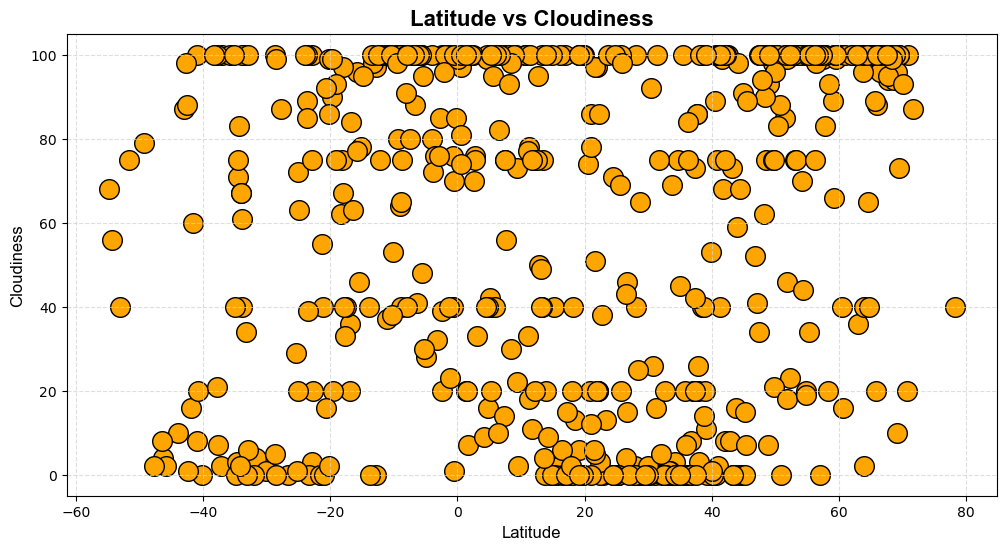

In [23]:
# Build the scatter plots for latitude vs. cloudiness

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df.Lat, df["Cloudiness"], color="orange", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Cloudiness", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16, fontfamily="Arial")


# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
# plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

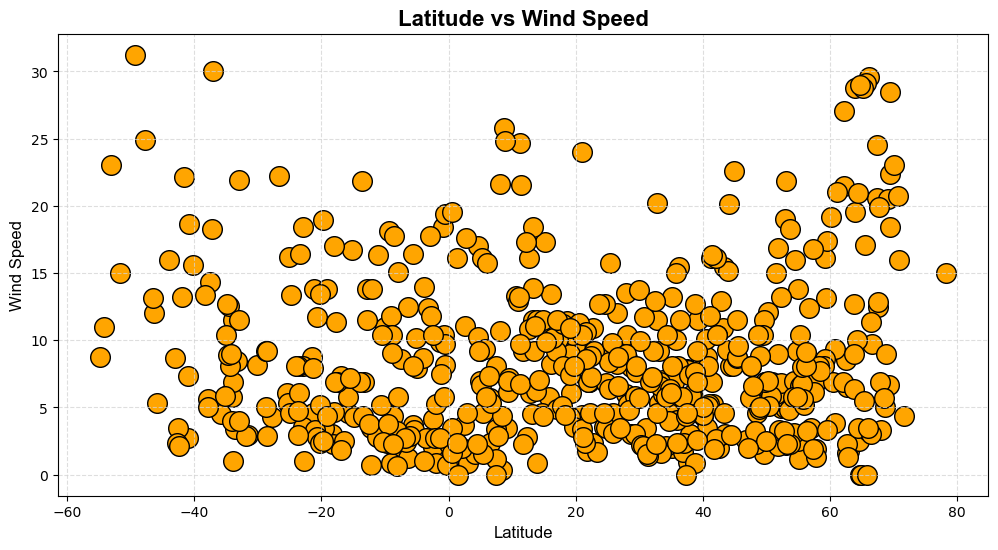

In [24]:
# Build the scatter plots for latitude vs. wind speed

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df.Lat, df["Wind Speed"], color="orange", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Wind Speed", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16, fontfamily="Arial")


# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
# plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots

def do_regression_plot(x_values, y_values, x_label, y_label, annotation):
    # do regression
    (slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # these are the points/predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(rvalue)
    print(line_eq)

    # Change Canvas Size
    plt.figure(figsize=(12, 6))
    
    # Create a basic plot
    plt.scatter(x_values, y_values, color="orange", edgecolor="black", s=200)
    plt.plot(x_values, regress_values, color="black", linewidth=6) # the regression line
    
    # Customizations
    
    # Change colors
    # Add in reference lines
    # Add Labels/Title
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")
    
    # Add in a background grid
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    
    # Annotate
    plt.annotate(line_eq, annotation, fontsize=15, color="black")
    
    # Show/Save the Graph
    plt.show()

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df.loc[df.Lat >= 0].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Haiku-Pauwela,20.9219,-156.3051,75.96,67,20,24.00,1016,US,1733001057
1,Hawaiian Paradise Park,19.5933,-154.9731,78.08,69,0,8.05,1016,US,1733001058
2,Bethel,41.3712,-73.4140,34.30,55,100,6.91,1015,US,1733001031
3,Chibougamau,49.9168,-74.3659,22.62,86,100,6.91,1004,CA,1733001061
4,San Pedro Pochutla,15.7333,-96.4667,89.71,48,0,5.75,1010,MX,1733001064


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df.loc[df.Lat < 0].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Adamstown,-25.0660,-130.1015,73.17,82,72,16.22,1021,PN,1733001059
1,Grytviken,-54.2811,-36.5092,37.49,78,56,10.96,991,GS,1733001063
2,Port-aux-Français,-49.3500,70.2167,43.03,95,79,31.23,986,TF,1733001065
3,Amarante do Maranhão,-5.5667,-46.7422,89.35,36,100,3.71,1006,BR,1733001066
4,Minas de Marcona,-15.2119,-75.1103,67.21,68,78,16.69,1011,PE,1733001072


###  Temperature vs. Latitude Linear Regression Plot

In [43]:
print(northern_hemi_df.columns)

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Pressure', 'Country', 'Date'],
      dtype='object')


-0.848106210782395
y = -1.19x + 91.03


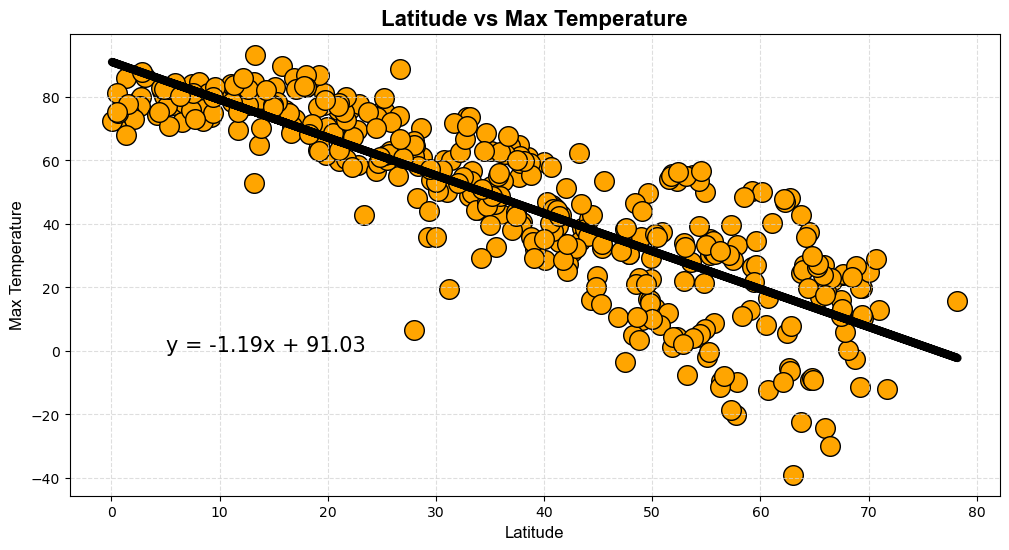

In [44]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
annotation = (5, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.7182734443662673
y = 0.51x + 83.69


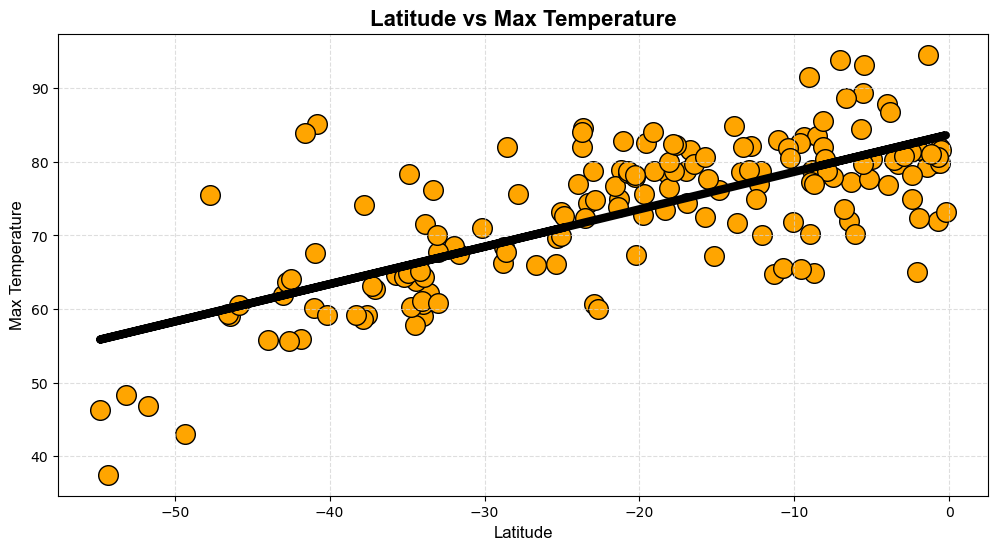

In [45]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
annotation = (5, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** As the Latitdude reaches closer to the equator, the Max Temperature is going to be doing a steady climb to hotter Max Temperatures in the Southern Hemisphere.  As the Latitude moves further above the equator, the Max Temperature is going to be doing a steady drop to cooler Max Temperatures in the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

0.36722429976431353
y = 0.41x + 56.23


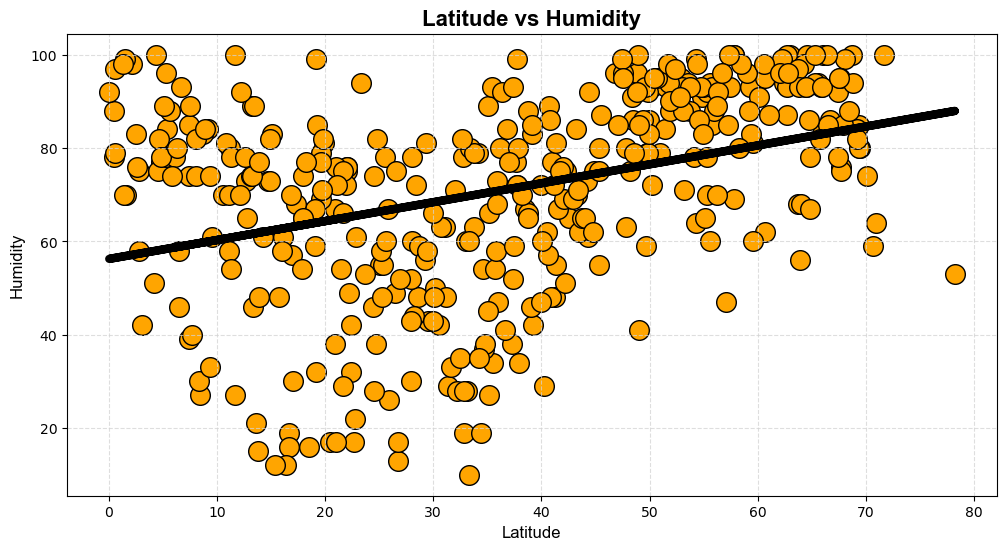

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotation = (5, 0)

# Call the regression plot function
do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.12284960932439117
y = 0.17x + 76.49


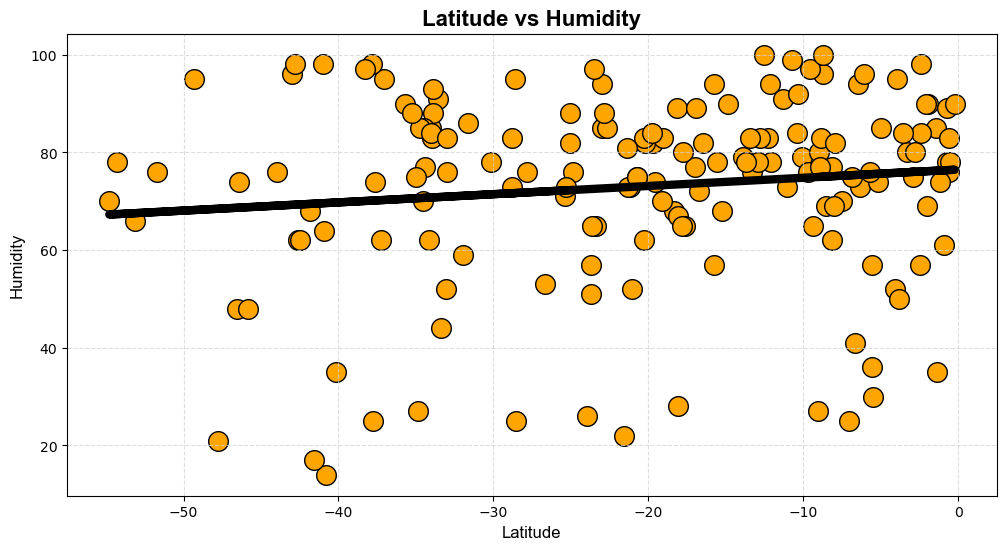

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotation = (5, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** Based on both the Northern and Southern Hemispheres, the humidity is going to be higher based on the Latitdude closer to the equator which could also vary on elevation and weather conditions

### Cloudiness vs. Latitude Linear Regression Plot

0.31418459409864535
y = 0.66x + 31.65


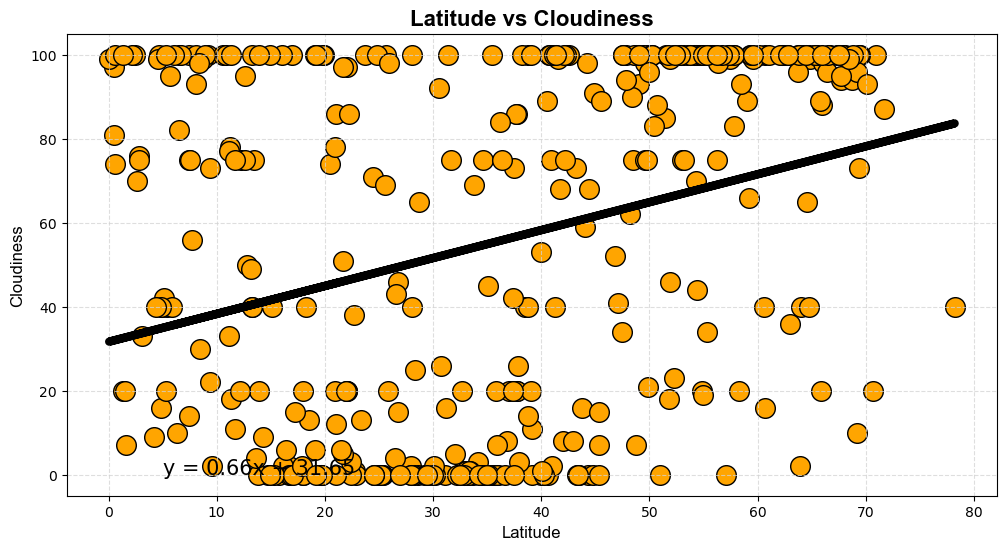

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (5, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.29196423393349274
y = 0.76x + 75.52


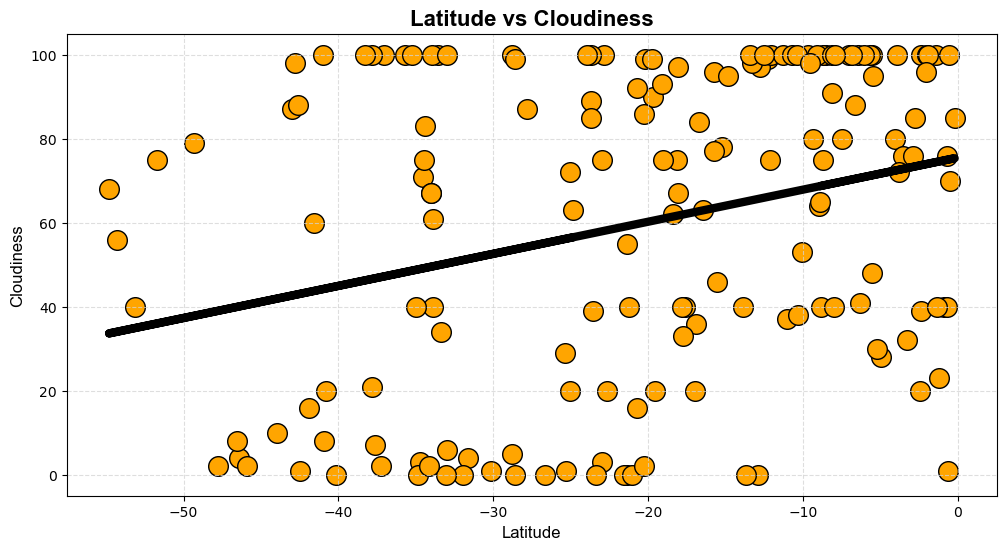

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (5, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** After comparing the Northern and Southern Hemisphere, the Cloudiness seems to be higher as the Latitude gets closer to the equator or 0 degrees in both Latitude and Longitude

### Wind Speed vs. Latitude Linear Regression Plot

0.15282765974311144
y = 0.05x + 6.78


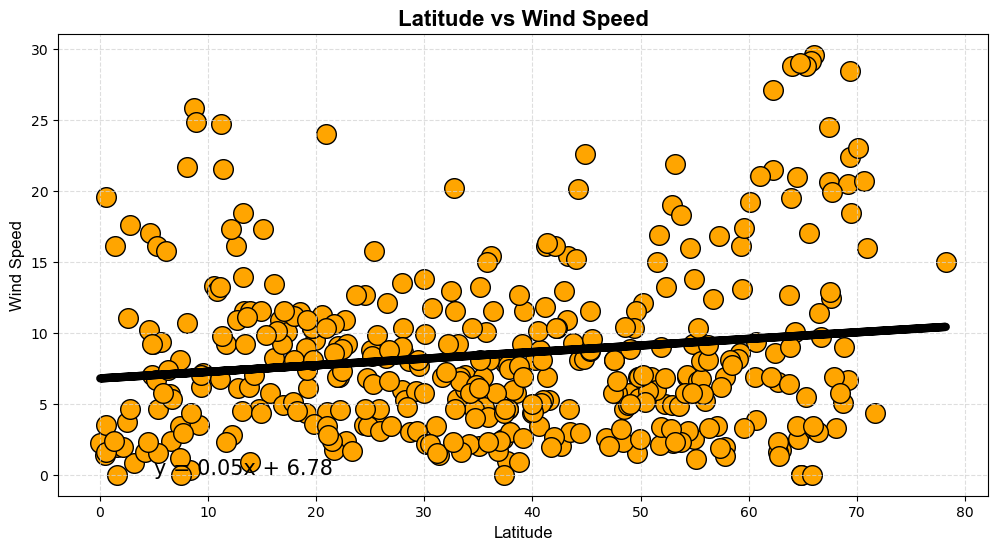

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (5, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

-0.24878929107490633
y = -0.11x + 6.35


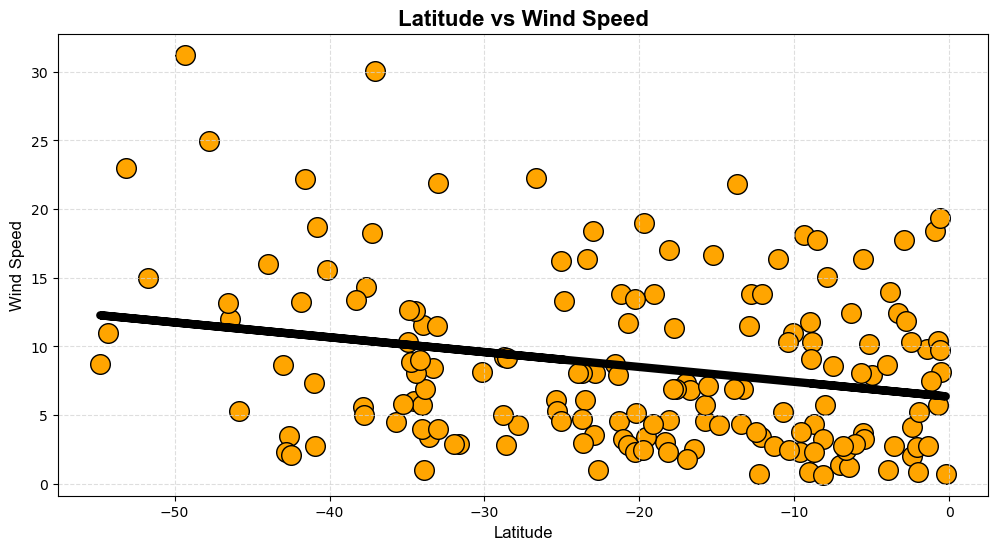

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (5, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** Based on both the Northern and Southern Hemisphere, the wind speeds seem to be on the slower side of the with most of the cities near the equator.  Whereas, with the cities that are higher in Latitude have a trend of higher wind speeds.